In [ ]:
#IT 5113 W71 2024 Fall Computer Programming for Data Scientists | Project |Leni Burrow
#This code will create a train_model and predict_sentiment functions
#This code will be tested with the test.csv data file


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritanjalijain/amazon-reviews")

print("Path to dataset files:", path)

100%|██████████| 1.29G/1.29G [00:26<00:00, 51.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kritanjalijain/amazon-reviews/versions/2


In [4]:
train_file = path + "/train.csv"
test_file = path + "/test.csv"

In [5]:

from re import sub
#import libraries
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

#read data files and insert column headings
df1=pd.read_csv(train_file, header=None, names=['polarity','title', 'review'])
df2=pd.read_csv(test_file, header=None, names=['polarity','title', 'review'])


In [6]:
#Reduce dataset to 10K samples each for debugging
#df1=df1.sample(n=30000,random_state=42).reset_index(drop=True) #Randomly sample 10K rows from train.csv file
#df2=df2.sample(n=30000,random_state=42).reset_index(drop=True) #Randomly sample 10K rows from test.csv file

In [7]:
#Import necessary libraries for text preprocessing
import nltk #Natural Language Toolkit (NLTK) for text preprocessing
import string #To handle text-related operations, ex: punctuation
from nltk.corpus import stopwords #Provides a list of common stopwords
from nltk.tokenize import word_tokenize #Tokenizer to split into individual words
from nltk.stem import WordNetLemmatizer #For reducing words to their root form

#Download necessary resources from NLTK
nltk.download('punkt_tab') #Tokenization models
nltk.download('stopwords') #Predefined list of stopwords in multiple languages
nltk.download('wordnet') #Database required for lemmatizer

#Intialize Lemmatizer (to reduce words to base form) and stopwords (to filter out common words)
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english')) #Load English stopwords as efficient lookups

def pre_process_text(text):
  """
  Preprocesses the input text by applying multiple steps to clean and standardize it

  Steps:
  1. Convert text to lowercase
  2. Remove punctuation and digits to keep only meaningful words
  3. Tokenize the text into indivual words
  4. Remove stopwords (common words like 'the', 'is', 'and') and lemmatize the words
  5. Rejoin the cleaned words back into a single string
  """

  #1. Convert text to lowercase
  text=text.lower()

  #2. Remove punctuation and digits to keep only meaningful words
  text=sub('[^a-zA-Z]', ' ', text)

  #3. Tokenize the text into individual words
  tokens=word_tokenize(text)

  #4. Remove stopwords (common words like 'the', 'is', 'and') and lemmatize the words
  cleaned_tokens=[lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

  #5. Rejoin the cleaned words back into a single string
  cleaned_text=' '.join(cleaned_tokens)

  return cleaned_text






[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
#Apply preprocessing function to the 'review' column in the train and test datasets
df1['processed_review']=df1['review'].apply(pre_process_text) #preprocessing training data
df2['processed_review']=df2['review'].apply(pre_process_text) #preprocessing review data

In [9]:
'''
Display preview of processed data for train and test sets
'''
#Show the 1st 5 rows of the processed train data including polarity
print("Processed Train Data:")
print(df1[['processed_review', 'polarity']].head())



Processed Train Data:
                                    processed_review  polarity
0  sound track beautiful paint senery mind well w...         2
1  reading lot review saying best game soundtrack...         2
2  soundtrack favorite music time hand intense sa...         2
3  truly like soundtrack enjoy video game music p...         2
4  played game know divine music every single son...         2


In [10]:
##Show the 1st 5 rows of the processed test data including polarity
print("Processed Test Data:")
print(df2[['processed_review', 'polarity']].head())


Processed Test Data:
                                    processed_review  polarity
0  lovely pat one great voice generation listened...         2
1  despite fact played small portion game music h...         2
2  bought charger jul worked ok design nice conve...         1
3  check maha energy website powerex mh c f charg...         2
4  reviewed quite bit combo player hesitant due u...         2


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize TF-IDF Vectorizer
tfidf_vectorizer=TfidfVectorizer(max_features=5000) #Limit to top 5000 features

#Fit and transform the train data
X_train_tfidf=tfidf_vectorizer.fit_transform(df1['processed_review'])

#Transform the test data
X_test_tfidf=tfidf_vectorizer.transform(df2['processed_review'])

#Display shape of both matrices
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)



Shape of X_train_tfidf: (3600000, 5000)
Shape of X_test_tfidf: (400000, 5000)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Define target variable (polarity)
y_train=df1['polarity']
y_test=df2['polarity']

#Initialize Logistic Regression classifier
clf=LogisticRegression()

#Train the model
clf.fit(X_train_tfidf, y_train)

#Make predictions on the test set
y_pred=clf.predict(X_test_tfidf)

#Evaluate the model
accuracy=accuracy_score(y_test, y_pred)
classification_rep=classification_report(y_test, y_pred)

#Display results
print("Accuracy on Test Data:", accuracy)
print("Classification Report:\n", classification_rep)
clf.vectorizer=tfidf_vectorizer

Accuracy on Test Data: 0.8647
Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.86      0.86    200000
           2       0.86      0.87      0.87    200000

    accuracy                           0.86    400000
   macro avg       0.86      0.86      0.86    400000
weighted avg       0.86      0.86      0.86    400000



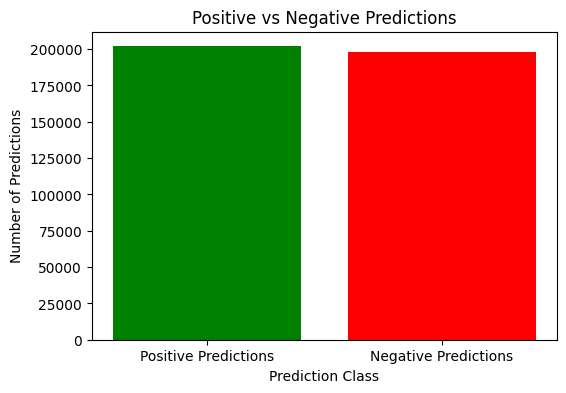

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your target variable (polarity) is binary: 1 for positive, 0 for negative
# Count the positive and negative predictions
positive_predictions = np.sum(y_pred == 2)
negative_predictions = np.sum(y_pred == 1)

# Create a bar chart
labels = ['Positive Predictions', 'Negative Predictions']
values = [positive_predictions, negative_predictions]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Prediction Class')
plt.ylabel('Number of Predictions')
plt.title('Positive vs Negative Predictions')
plt.show()


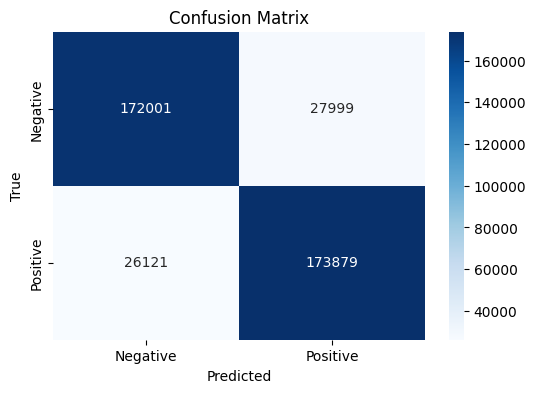

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
#Function to preprocess input text and predict sentiment
def predict_sentiment(input_text):
  """
  Preprocesses the input text, transform it using the trained TfldVectorizer, and uses the trained Logistic Regression model to predict its sentiment
  """

    #Preprocess the input text
  processed_review=pre_process_text(input_text)

    #Transform the processed text into a TF-IDF feature vector
  input_tfidf=clf.vectorizer.transform([processed_review])

    #Predict sentiment using the training model
  sentiment=clf.predict(input_tfidf)[0]

  return sentiment

  #Allow user to input their text and predict sentiment
while True:
    #User Prompt
    user_input=input("Enter a review to analyze the sentiment (or type 'exit' to quit):")

    #Exit loop if user types 'exit'
    if user_input.lower()=='exit':
      print("Exiting the sentiment analysis. Goodbye!")
      break

    #Predict sentiment
    sentiment=predict_sentiment(user_input)

    #Display sentiment result
    print(f"Predicted Sentiment:, {'Positive' if sentiment==2 else 'Negative'}")

Enter a review to analyze the sentiment (or type 'exit' to quit):This is awful
Predicted Sentiment:, Negative
Enter a review to analyze the sentiment (or type 'exit' to quit):Just ok
Predicted Sentiment:, Negative
Enter a review to analyze the sentiment (or type 'exit' to quit):Amazing
Predicted Sentiment:, Positive
Enter a review to analyze the sentiment (or type 'exit' to quit):Could be better
Predicted Sentiment:, Negative
Enter a review to analyze the sentiment (or type 'exit' to quit):Best it could be
Predicted Sentiment:, Positive
Enter a review to analyze the sentiment (or type 'exit' to quit):Exit
Exiting the sentiment analysis. Goodbye!
